In [1]:
import numpy as np
#linear algebra 
import pandas as pd
#data reading tool
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode 
init_notebook_mode(connected=True)
print ("We are ready to Go")

We are ready to Go


In [2]:
data = pd.read_csv('segment.csv')

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
plot_data = data.groupby('Segmentation')['Segmentation'].agg(['count']).reset_index()
fig =px.pie (plot_data, values = plot_data['count'], names = plot_data['Segmentation'])
fig.update_traces(textposition = 'inside', textinfo ='percent + label', hole =0.5, 
                 marker = dict
                (colors = ['#2A3132', '#336B87'], line = dict(color = 'white', width = 2)))
fig.update_layout (title_text = 'Customer <br> Segmentation', title_x = 0.5, title_y = 0.55, title_font_size= 26,
                  title_font_family = 'calibri', title_font_color = 'Black', showlegend = False)
fig.show()

In [21]:
def plot_category(feature, figsize = None):
    A_count = data[data['Segmentation']=='A'].groupby([feature]).size()
    B_count = data[data['Segmentation']=='B'].groupby([feature]).size()
    C_count = data[data['Segmentation']=='C'].groupby([feature]).size()
    D_count = data[data['Segmentation']=='D'].groupby([feature]).size()
    labels = A_count.index 
    x = np.arange(len(labels))
    # the label location
    width = 0.7 
    # the width of the bar 
    if figsize: 
        fig, ax = plt.subplots(figsize=figsize)
    else:
            fig, ax = plt.subplots()
            rects1 = ax.bar(x-width/3, round(A_count*100/data.groupby([feature]).size(), 2), 
                            width/5, label='A')
            rects2 = ax.bar(x-width/8, round(B_count*100/data.groupby([feature]).size(), 2),
                           width/5, label='B')
            rects3 = ax.bar(x-width/8, round(C_count*100/data.groupby([feature]).size(), 2),
                           width/5, label='C')
            rects4 = ax.bar(x-width/3, round(D_count*100/data.groupby([feature]).size(), 2),
                           width/5, label='D')
            
            ax.set_ylabel('count')
            ax.set_title('Based on %s'%feature)
            ax.set_xtricks(x)
            ax.set_xtricklabels(labels, rotation =80)
            ax.legend(loc= 0, bbox_to_another=(1, 1));
            ax.bar_label(rects1, padding =1)
            ax.bar-label(rects2, padding =1)
            ax.bar_label(rects3, padding =1)
            ax.bar_label(rects4, padding =1)
            
            fig.tight_layout()
            plt.show()
def plot_numerical(feature, figsize=None):
    fig =plt.figure(figsize= (10,6))
    sns.kdeplot(data[data['Segmentation'] == 'A'][feature])
    sns.kdeplot(data[data['Segmentation'] == 'B'][feature])
    sns.kdeplot(data[data['Segmentation'] == 'C'][feature])
    sns.kdeplot(data[data['Segmentation'] == 'D'][feature])
    fig.legend(labels=['Segmentation A', 'Segmentation B', 'Segmentation C', 'Segmentation D'])
    plt.title ('Based on %s' %feature)
    plt.show()
    
def plot_pie(feature):
    plot_data = data.groupby([feature, 'Segmentation'])[feature].agg({'count'}).reset_index()
    fig = px.sunburst(plot_data, path = [feature, 'Segmentation'], values = 'count', color = feature,
                     title = 'Affect of %s on Cutomer Segmentation' %feature, width = 600, height = 600)
    
    fig.update_layout(plot_bgcolor = 'white', title_font_family ='Calibri Black', title_font_color ='#221f1f',
                             title_font_size = 22, title_x = 0.5)
    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [18]:
for feature in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
    plot_pie(feature)

In [19]:
for feature in ['Profession', 'Var_1']:
    plot_pie(feature)

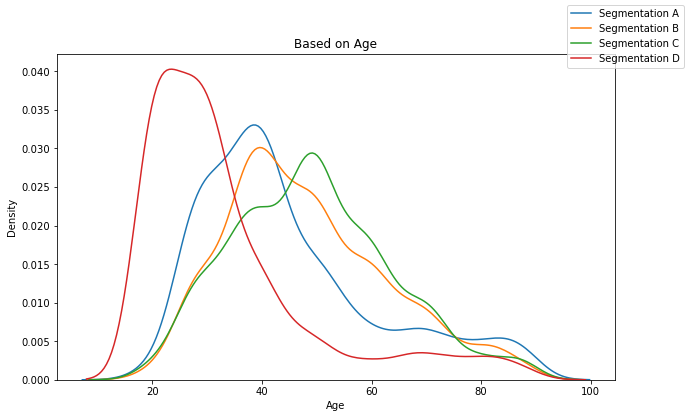

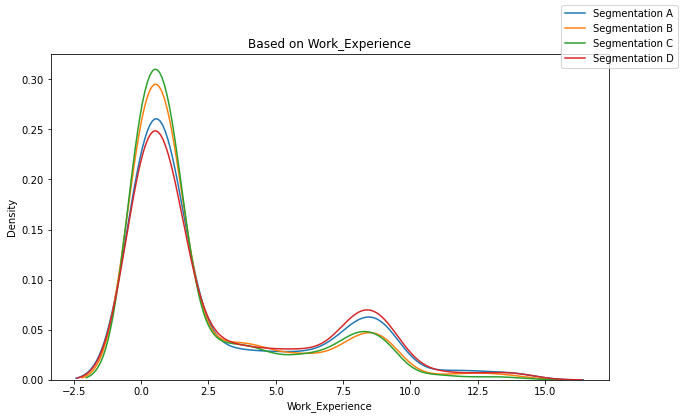

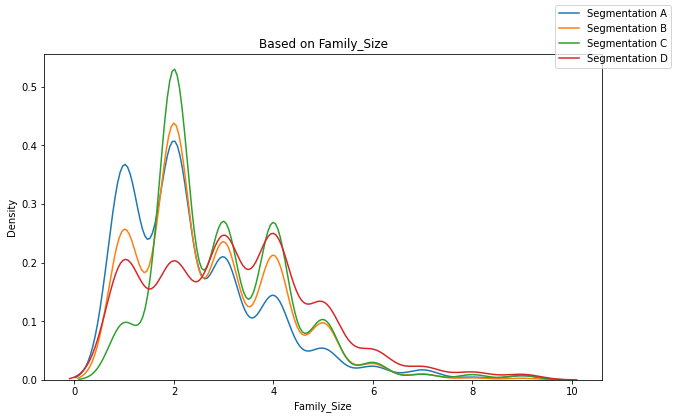

In [22]:
for feature in ['Age', 'Work_Experience', 'Family_Size']:
    plot_numerical(feature)